## Examples with ```CopasiProcess``` using ``builder.Builder`` and ``biosimulator_processes.data_model``

In [1]:
from builder import Builder, Process
from process_bigraph import pp, pf 
from biosimulator_processes import CORE
from biosimulator_processes.data_model import *
from biosimulator_processes.biosimulator_builder import BiosimulatorBuilder

CobraProcess registered successfully.


/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulator-processes-KVuYbFzt-py3.10/lib/python3.10/site-packages/pydantic/_internal/_fields.py:151: UserWarning: Field "model_id" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulator-processes-KVuYbFzt-py3.10/lib/python3.10/site-packages/pydantic/_internal/_fields.py:151: UserWarning: Field "model_source" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulator-processes-KVuYbFzt-py3.10/lib/python3.10/site-packages/pydantic/_internal/_fields.py:151: UserWarning: Field "model_language" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protecte

CopasiProcess registered successfully.
SmoldynProcess registered successfully.
TelluriumProcess registered successfully.


#### Initialize a fresh instance of the `BiosimulatorBuilder`, which is inherently configured by `biosimulator_processes.CORE`.

In [2]:
b = BiosimulatorBuilder()

In [3]:
###### list registered processes

b.list_processes()

['TelluriumProcess',
 'ram-emitter',
 'CobraProcess',
 'SmoldynProcess',
 'console-emitter',
 'CopasiProcess']

In [4]:
from basico import *
from basico import biomodels


model = load_biomodel('BIOMD0000000861')

In [5]:
get_species(model=model)

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id
name,,,,,,,,,,,,,
EpoRJAK2,cyt,reactions,nmol/l,3.976220e+00,9.578143e+14,,,3.976220e+00,9.578143e+14,-0.314737,-7.581552e+13,Metabolite_0,EpoRJAK2
EpoRpJAK2,cyt,reactions,nmol/l,0.000000e+00,0.000000e+00,,,0.000000e+00,0.000000e+00,0.314737,7.581552e+13,Metabolite_1,EpoRpJAK2
p1EpoRpJAK2,cyt,reactions,nmol/l,0.000000e+00,0.000000e+00,,,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,Metabolite_2,p1EpoRpJAK2
p2EpoRpJAK2,cyt,reactions,nmol/l,0.000000e+00,0.000000e+00,,,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,Metabolite_3,p2EpoRpJAK2
p12EpoRpJAK2,cyt,reactions,nmol/l,0.000000e+00,0.000000e+00,,,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,Metabolite_4,p12EpoRpJAK2
EpoRJAK2_CIS,cyt,reactions,nmol/l,0.000000e+00,0.000000e+00,,,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,Metabolite_5,EpoRJAK2_CIS
SHP1,cyt,reactions,nmol/l,2.672510e+01,6.437693e+15,,,2.672510e+01,6.437693e+15,0.000000,0.000000e+00,Metabolite_6,SHP1
SHP1Act,cyt,reactions,nmol/l,0.000000e+00,0.000000e+00,,,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,Metabolite_7,SHP1Act
STAT5,cyt,reactions,nmol/l,7.975350e+01,1.921147e+16,,,7.975350e+01,1.921147e+16,0.000000,0.000000e+00,Metabolite_8,STAT5


#### Example 1: Add a simple `CopasiProcess`-based composite to the bigraph, specifying parameter values through the `data_model`. For now, let's try loading a biomodel and adding a change to initial concentration of a species

In [6]:
# 1. specify model changes

process_model_changes = ModelChanges(
    species_changes=SpeciesChanges(
        name='SHP1',
        initial_concentration=5.00000
    )
)


pp(process_model_changes.model_dump())

{ 'global_parameter_changes': [],
  'reaction_changes': [],
  'species_changes': { 'expression': '',
                       'initial_concentration': 5.0,
                       'initial_expression': '',
                       'initial_particle_number': None,
                       'name': 'SHP1',
                       'unit': ''}}


In [7]:
# 2. define the model schema to be used by the composite process (one of the copasiprocess config parameters)

process_model = Model(
    model_id='simple_copasi_process',
    model_source='BIOMD0000000861',
    model_name='Simple Composite Process',
    model_changes=process_model_changes
)


pp(process_model.model_dump())

{ 'model_changes': { 'global_parameter_changes': [],
                     'reaction_changes': [],
                     'species_changes': { 'expression': '',
                                          'initial_concentration': 5.0,
                                          'initial_expression': '',
                                          'initial_particle_number': None,
                                          'name': 'SHP1',
                                          'unit': ''}},
  'model_id': 'simple_copasi_process',
  'model_language': 'sbml',
  'model_name': 'Simple Composite Process',
  'model_source': {'value': 'BIOMD0000000861'},
  'model_units': None}


In [8]:
# 3. Define config schema to be used as 'config' parameter of Process constructor


process_config = CopasiProcessConfigSchema(
    method='stochastic',
    model=process_model,
    process_name='simple_copasi'
)


process_config_dict = process_config.model_dump()
process_config_dict.pop('process_name')
pp(process_config_dict)

{ 'method': 'stochastic',
  'model': { 'model_changes': { 'global_parameter_changes': [],
                                'reaction_changes': [],
                                'species_changes': { 'expression': '',
                                                     'initial_concentration': 5.0,
                                                     'initial_expression': '',
                                                     'initial_particle_number': None,
                                                     'name': 'SHP1',
                                                     'unit': ''}},
             'model_id': 'simple_copasi_process',
             'model_language': 'sbml',
             'model_name': 'Simple Composite Process',
             'model_source': {'value': 'BIOMD0000000861'},
             'model_units': None}}


In [9]:
process_config.model

{'model_id': 'simple_copasi_process',
 'model_source': {'value': 'BIOMD0000000861'},
 'model_language': 'sbml',
 'model_name': 'Simple Composite Process',
 'model_changes': {'species_changes': {'name': 'SHP1',
   'unit': '',
   'initial_concentration': 5.0,
   'initial_particle_number': None,
   'initial_expression': '',
   'expression': ''},
  'global_parameter_changes': [],
  'reaction_changes': []},
 'model_units': None}

In [10]:
process_config.model

{'model_id': 'simple_copasi_process',
 'model_source': {'value': 'BIOMD0000000861'},
 'model_language': 'sbml',
 'model_name': 'Simple Composite Process',
 'model_changes': {'species_changes': {'name': 'SHP1',
   'unit': '',
   'initial_concentration': 5.0,
   'initial_particle_number': None,
   'initial_expression': '',
   'expression': ''},
  'global_parameter_changes': [],
  'reaction_changes': []},
 'model_units': None}

In [11]:
# 4. Add the process instance by the name of 'simple_copasi' to the builder


b[process_config.process_name].add_process(
    name='CopasiProcess',
    model=process_config.model,
    method=process_config.method
)

THE CHANGES: {'name': 'SHP1', 'unit': '', 'initial_concentration': None, 'initial_particle_number': '', 'initial_expression': '', 'expression': ''}


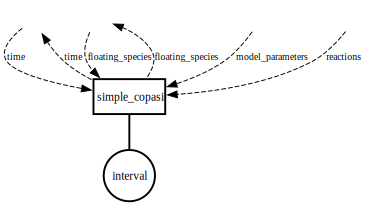

In [12]:
# visualize shows the process with its disconnected ports
b.visualize()

In [ ]:
b

### print ports

In [ ]:
b['event_process'].interface(True)

### connect ports using connect_all
`Builder.connect_all` connects ports to stores of the same name.

In [ ]:
b.connect_all(append_to_store_name='_store')
b

In [ ]:
b.visualize()

### add interval process to the config

In [ ]:
b['interval_process'].add_process(
    name='GillespieInterval',
)

In [ ]:
b.visualize()

### connect port to specific target

In [ ]:
# to connect a port in a more targeted way, use connect and specify the port and its target path
b['interval_process'].connect(port='interval', target=['event_process', 'interval']) 

# the remaining ports can connect_all
b.connect_all() 

In [ ]:
b.visualize()

### check current Builder config

In [ ]:
b

## Update the initial state

In [ ]:
initial_state = {
    'DNA_store': {
        'A gene': 2.0,
        'B gene': 1.0},
}
b.update(initial_state)

## Generate composite from builder config and simulate

In [ ]:
composite = b.generate()
composite.run(10)

In [ ]:
composite

## Retrieve the composite document

In [ ]:
doc = b.document()
doc

### save the document to file

In [ ]:
b.write(filename='toy_bigraph')

### load a composite from document
This document represents the full state of the composite, and so can reproduce the previous composite when loaded into a fresh Builder

In [ ]:
b2 = Builder(core=core, file_path='out/toy_bigraph.json')
b2

In [ ]:
b2.visualize()

### Example 2: Parameter scan composite